# 数据预处理

## 数据无量纲化

### 数据归一化

$$x^* = \frac{x - min(x)}{max(x)-min(x)}$$

In [1]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

```

```
学过Numpy的你们，能够判断data的结构嘛？

In [2]:
import numpy as np
X = np.array(data)
X

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

（1）使用Numpy来实现归一化

In [3]:
#归一化
X_nor = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_nor

#逆转归一化
X_returned = X_nor * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X_returned

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

```

```
如果换成表是什么样子？

In [4]:
import pandas as pd
x = pd.DataFrame(data)
x

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


```

```
（2）使用pandas来实现归一化

In [5]:
#归一化
x_nor = (x - x.min()) / (x.max() - x.min())
x_nor

#逆转归一化
x_returned = x_nor * (x.max() - x.min()) + x.min()
x_returned

,0,1
0,-1.0,2.0
1,-0.5,6.0
2,0.0,10.0
3,1.0,18.0


```

```
（3）使用sklearn中的**preprocessing.MinMaxScaler**来实现归一化

In [6]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [7]:
from sklearn.preprocessing import MinMaxScaler

#实现归一化
scaler = MinMaxScaler()              #实例化
scaler = scaler.fit(data)            #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(data)      #通过接口导出结果
result

result_ = scaler.fit_transform(data) #训练和导出结果一步达成

scaler.inverse_transform(result)     #将归一化后的结果逆转

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [8]:
scaler.data_min_

array([-1.,  2.])

In [9]:
scaler.data_max_

array([ 1., 18.])

In [10]:
scaler.data_range_

array([ 2., 16.])

In [11]:
#使用MinMaxScaler的参数feature_range实现将数据归一化到[0,1]以外的范围中

scaler = MinMaxScaler(feature_range=[5,10])    #依然实例化
result = scaler.fit_transform(data)            #fit_transform一步导出结果
result

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

> 当X中的特征数量非常多的时候，fit会报错并表示，数据量太大了我计算不了
> 此时使用partial_fit作为训练接口    
> scaler = scaler.partial_fit(data)

### 数据标准化  

 $$x^* = \frac{x-μ}\sigma$$ 

In [12]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()         #实例化
scaler.fit(data)                  #fit，本质是生成均值和方差

scaler.mean_                      #查看均值的属性mean_
scaler.var_                       #查看方差的属性var_

x_std = scaler.transform(data)    #通过接口导出结果

x_std.mean()                      #导出的结果是一个数组，用mean()查看均值
x_std.std()                       #用std()查看方差

scaler.fit_transform(data)        #使用fit_transform(data)一步达成结果

scaler.inverse_transform(x_std)   #使用inverse_transform逆转标准化

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

```



```
**练习**   
    1.生成100个随机数    
    2.对随机数进行升序排序    
    3.绘制这100个数的直方图    
    4.对数据进行标准化处理    
    5.再次绘制标准化处理过后的直方图   
    
思考：数据标准化能否改变数据的分布？

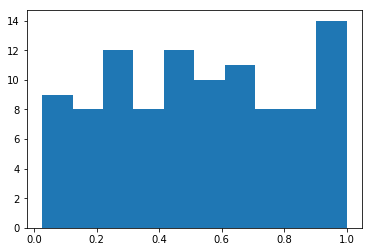

In [17]:
import matplotlib.pyplot as plt   #导入可视化包

a = np.random.rand(100)           #生成100个随机数
a.sort()                          #对数据进行排序
a = a.reshape(-1,1)               #sklearn只允许输入至少二维数组，所以需要对数据进行格式转换  
plt.hist(a);                      #绘制直方图

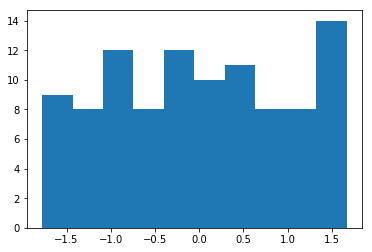

In [18]:
#对数据进行标准化处理
from sklearn.preprocessing import StandardScaler  #导入标准化包
scaler = StandardScaler()                         #实例化
b = scaler.fit_transform(a)                       #fit_transform一步导出结果
plt.hist(b);                                      #绘制标准化之后的直方图

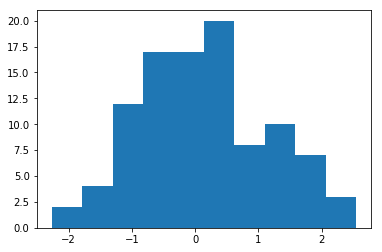

In [19]:
#标准正态分布的直方图
c = np.random.randn(100)
c.sort()
plt.hist(c);

##  缺失值处理

In [20]:
import pandas as pd
data = pd.read_csv("Narrativedata.csv")
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


In [22]:
#查看缺失值
data.isnull().sum()

Age         177
Sex           0
Embarked      2
Survived      0
dtype: int64

In [23]:
#Tips:缺失值比例
data.isnull().mean()

Age         0.198653
Sex         0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64

In [25]:
#填补年龄
Age = data.loc[:,"Age"].values.reshape(-1,1)     #sklearn当中特征矩阵必须是二维
Age[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [nan],
       [31.],
       [nan]])

In [26]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer()                              #实例化，默认均值填补
imp_median = SimpleImputer(strategy="median")           #实例化，用中位数填补
imp_0 = SimpleImputer(strategy="constant",fill_value=0) #实例化，用0填补

#fit_transform一步完成调取结果
imp_mean = imp_mean.fit_transform(Age)
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)

imp_mean[:20]
imp_median[:20]
imp_0[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [ 0.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [ 0.],
       [31.],
       [ 0.]])

In [27]:
#在这里我们使用中位数填补Age
data.loc[:,"Age"] = imp_median

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


In [29]:
#使用众数填补Embarked
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)
imp_mode = SimpleImputer(strategy = "most_frequent")
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


```

```
使用numpy和pandas填补缺失值

In [31]:
import pandas as pd
data = pd.read_csv("Narrativedata.csv") 
data.head()

#查看缺失值
data.isnull().sum() 

#用中位数填补Age的缺失值
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())

#由于Embarked的缺失值较少，可以直接删除
data.dropna(axis=0,inplace=True)

```


```

## 处理分类型特征：编码与哑变量

- **preprocessing.LabelEncoder**：标签专用，能够将分类转换为分类数值

In [32]:
from sklearn.preprocessing import LabelEncoder

y = data.iloc[:,-1]                 #要输入的是标签，不是特征矩阵，所以允许一维

le = LabelEncoder()                 #实例化
le = le.fit(y)                      #导入数据
label = le.transform(y)             #transform接口调取结果
data.iloc[:,-1] = label             #让标签等于我们运行出来的结果
data.head()

#查看相关属性
le.classes_                         #属性.classes_查看标签中究竟有多少类别
label                               #查看获取的结果label

le.fit_transform(y)                 #也可以直接fit_transform一步到位
le.inverse_transform(label)         #使用inverse_transform可以逆转

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No', 'Unknown',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Unknown', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'No', 'Ye

In [33]:
#如果不需要教学展示的话我会这么写：
from sklearn.preprocessing import LabelEncoder
data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])

```


```
- **preprocessing.OrdinalEncoder**：特征专用，能够将分类特征转换为分类数值

In [34]:
from sklearn.preprocessing import OrdinalEncoder

data_ = data.copy()
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])

#接口categories_对应LabelEncoder的接口classes_，一模一样的功能
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_

data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


```

```
- **preprocessing.OneHotEncoder**：独热编码，创建哑变量

In [35]:
from sklearn.preprocessing import OneHotEncoder

X = data.iloc[:,1:-1]   #提取出所有的名义变量
result = OneHotEncoder(categories='auto').fit_transform(X).toarray() #进行独热编码
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)   #合并原数据和编码后的结果
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)      #删除原名义变量
newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"] #重命名列名
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [36]:
#实例化并训练模型
enc = OneHotEncoder(categories='auto').fit(X) 

#transform接口调取结果
re = enc.transform(X).toarray()
re

re.shape

#依然可以还原
pd.DataFrame(enc.inverse_transform(re))

#获取模型特证名
enc.get_feature_names()

#合并原数据和独热编码
df = pd.concat([data,pd.DataFrame(re)],axis=1) #axis=1,表示跨行进行合并，也就是将量表左右相连，如果是axis=0，就是将量表上下相连
df.head()

#删除做过独热编码的特征
df.drop(['Embarked','Sex'],axis=1,inplace=True)
df.head()

#修改列名
df.columns = ['Age','Survived','Female', 'Male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,1.0,0.0,0.0,1.0


## 处理连续型特征：二值化与分段

- **sklearn.preprocessing.Binarizer**：根据阈值将数据二值化，特征专用

In [37]:
#将年龄二值化

data_2 = data.copy()

from sklearn.preprocessing import Binarizer

X = data_2.iloc[:,0].values.reshape(-1,1)               #类为特征专用，所以不能使用一维数组
transformer = Binarizer(threshold=30).fit_transform(X)

transformer[:5]

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.]])

```

```
- **preprocessing.KBinsDiscretizer**：将连续变量划分为分类变量

In [38]:
from sklearn.preprocessing import KBinsDiscretizer

X = data.iloc[:,0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit_transform(X)

#查看转换后分的箱：变成了一列中的三箱
set(est.fit_transform(X).ravel())

est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
#查看转换后分的箱：变成了哑变量
est.fit_transform(X).toarray()

est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='quantile')
#查看转换后分的箱：变成了哑变量,且每个类别数量基本相等
est.fit_transform(X).toarray().sum(0)

array([278., 310., 301.])

# 特征选择

In [6]:
import pandas as pd
data = pd.read_csv("digit recognizor.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.shape

(42000, 785)

In [8]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [9]:
X.shape

(42000, 784)

## filter过滤法

### 方差过滤

In [10]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()          #实例化，不填参数默认方差为0
X_var0 = selector.fit_transform(X)      #获取删除不合格特征之后的新特征矩阵

X_var0.shape

(42000, 708)

In [11]:
#将特征减少一半
import numpy as np
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
X_fsvar.shape

(42000, 392)

### 相关性过滤

#### 卡方检验(离散型标签）

In [13]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

##### 根据k值选择

In [ ]:
#假设在这里，已知需要300个特征
X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsvar, y)
X_fschi.shape

In [15]:
#验证模型效果
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

0.9333098667649198

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# 关于超参数k值学习曲线
score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once =cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)
plt.plot(range(350,200,-10),score)
plt.show()

##### 根据P值选择

In [ ]:
#根据P值选择特征
chi2val, pval = chi2(X_fsvar,y)

In [ ]:
chi2val

In [ ]:
pval

In [12]:
k = chi2val.shape[0] - (pval > 0.05).sum()
k

392

In [ ]:
k = (pval <= 0.05).sum()
k

#### F检验 (线性关系)

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
F, pval_f = f_classif(X_fsvar,y)
F

In [ ]:
pval_f

In [ ]:
k = F.shape[0] - (pval_f > 0.05).sum()
k

#### 互信息法(线性和非线性关系）

In [19]:
from sklearn.feature_selection import mutual_info_classif as MIC

In [ ]:
result = MIC(X_fsvar,y)

In [ ]:
k = result.shape[0] - sum(result <= 0)

### Embedded嵌入法（过滤法进阶版）

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
RFC_ = RFC(n_estimators =10,random_state=0)

In [ ]:
X_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(X,y)
#在这里我只想取出来有限的特征。
#0.005这个阈值对于有780个特征的数据来说，是非常高的阈值
#因为平均每个特征只能够分到大约0.001的feature_importances_

In [45]:
X_embedded.shape

(42000, 47)

In [46]:
(RFC_.fit(X,y).feature_importances_).max()

0.01276360214820271

..............................下面代码感兴趣的自己运行，然后查看结果.........................................     
....................................【TIME WARNING】.........................................................

In [47]:
#学习曲线
import numpy as np
import matplotlib.pyplot as plt

RFC_.fit(X,y).feature_importances_

threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)

score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)

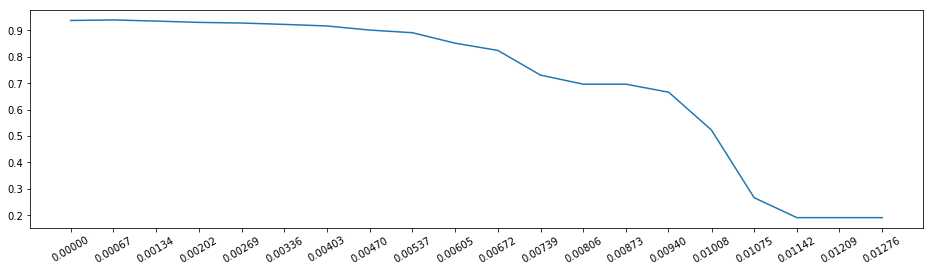

In [48]:
plt.figure(figsize=(16,4))
plt.plot(threshold,score)
plt.xticks(np.round(threshold,5),rotation=30)
plt.show()

### 3. Wrapper包装法

In [ ]:
from sklearn.feature_selection import RFE

In [49]:
RFC_ = RFC(n_estimators =10,random_state=0)
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(X, y)

In [50]:
# 返回特征的按数次迭代中综合重要性的排名
selector.support_.sum()

340

In [51]:
# 返回特征的按数次迭代中综合重要性的排名
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [ ]:
X_wrapper = selector.transform(X)

In [52]:
cross_val_score(RFC_,X_wrapper,y,cv=5).mean()

0.9389522459432109

In [ ]:
# n_features_to_select的学习曲线
score = []
for i in range(1,751,50):
    X_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()

# 降维算法

## 鸢尾花数据集的可视化

In [22]:
#导入模块和包
from sklearn.datasets import load_iris   #导入sklearn中内置的鸢尾花数据集
from sklearn.decomposition import PCA    #导入PCA降维算法
import matplotlib.pyplot as plt          #绘图包

In [23]:
#提取数据集
iris = load_iris()

In [24]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
X = iris.data
X.shape

(150, 4)

In [26]:
#调用PCA建模
pca = PCA(n_components=2)           #实例化
pca = pca.fit(X)                    #拟合模型
X_dr = pca.transform(X)             #获取新矩阵

In [27]:
X_dr.shape

(150, 2)

In [29]:
X_dr[y == 0]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [30]:
X_dr[y == 0, 0] #这里是布尔索引，看出来了么？

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978])

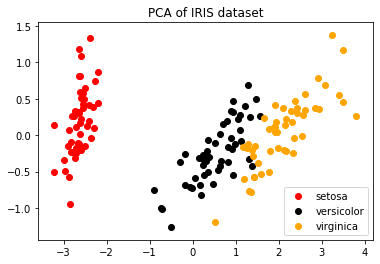

In [31]:
#要展示三中分类的分布，需要对三种鸢尾花分别绘图
#可以写成三行代码，也可以写成for循环

plt.figure()
plt.scatter(X_dr[y==0, 0], X_dr[y==0, 1], c="red", label=iris.target_names[0])
plt.scatter(X_dr[y==1, 0], X_dr[y==1, 1], c="black", label=iris.target_names[1])
plt.scatter(X_dr[y==2, 0], X_dr[y==2, 1], c="orange", label=iris.target_names[2])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()


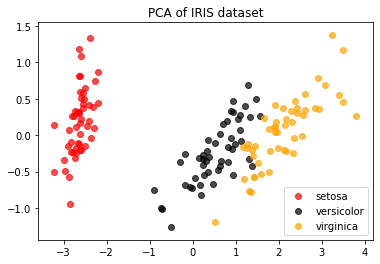

In [32]:
colors = ['red', 'black', 'orange']
iris.target_names

plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_dr[y == i, 0]
                ,X_dr[y == i, 1]
                ,alpha=.7
                ,c=colors[i]
                ,label=iris.target_names[i]
               )
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

In [33]:
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
pca.explained_variance_

array([4.22824171, 0.24267075])

In [34]:
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫做可解释方差贡献率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [35]:
pca.explained_variance_ratio_.sum()

0.977685206318795

## 选择最好的n_components

### 累积可解释方差贡献率曲线


In [37]:
import numpy as np
pca_line = PCA().fit(X)
pca_line.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [40]:
np.cumsum(pca_line.explained_variance_)

array([4.22824171, 4.47091245, 4.54912195, 4.57295705])

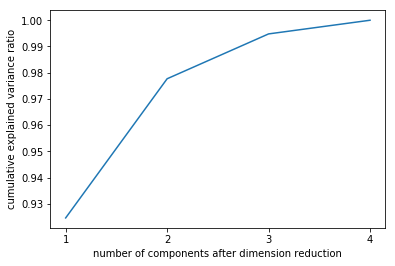

In [61]:
# np.cumsum(pca_line.explained_variance_ratio_)
# PCA()什么参数都没有

import numpy as np
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

### 最大似然估计自选超参数

In [36]:
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)
X_mle

pca_mle.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

#### 按信息量占比选超参数

In [63]:
pca_f = PCA(n_components=0.97,svd_solver="full")
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)

pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

## 案例：PCA对手写数字数据集的降维

In [64]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [65]:
#导入数据集
data = pd.read_csv("digit recognizor.csv")

X = data.iloc[:,1:]
y = data.iloc[:,0]

X.shape

(42000, 784)

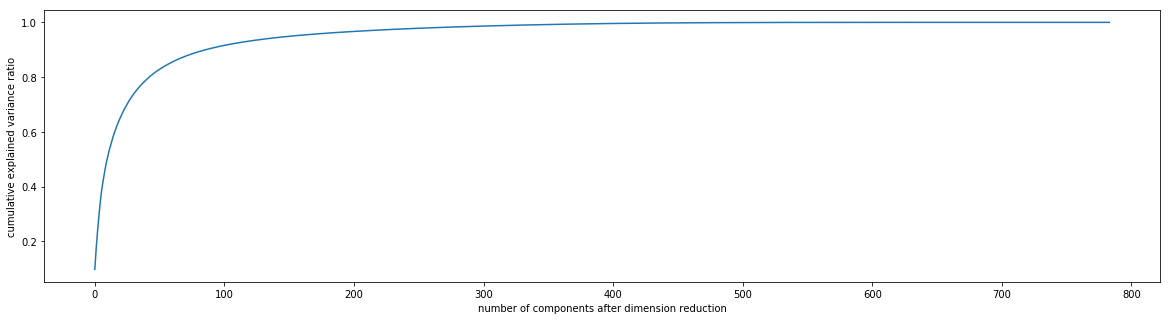

In [66]:
#画累计方差贡献率曲线，找最佳降维后维度的范围

pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

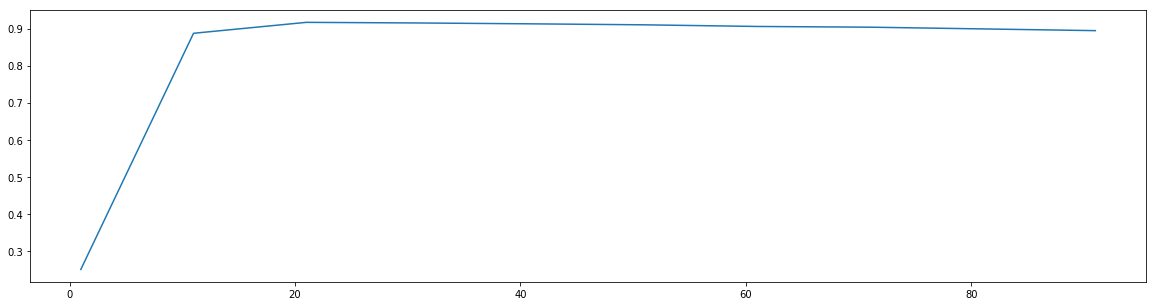

In [67]:
#降维后维度的学习曲线，继续缩小最佳维度的范围
#======【TIME WARNING：2mins 30s】======#

score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

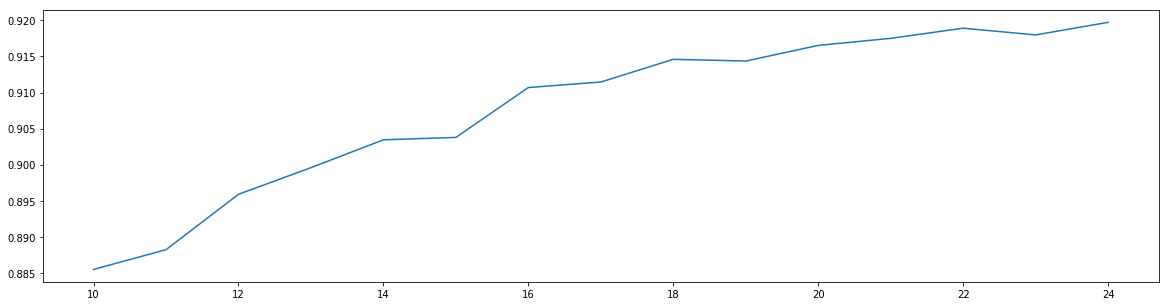

In [68]:
#降维后维度的学习曲线，继续缩小最佳维度的范围
#======【TIME WARNING：2mins 30s】======#

score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

In [69]:
#导入找出的最佳维度进行降维，查看模型效果
X_dr = PCA(23).fit_transform(X)

#======【TIME WARNING:1mins 30s】======#
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

0.9450001976813434

In [70]:
#换KNN模型
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),X_dr,y,cv=5).mean()

0.9698567240928199

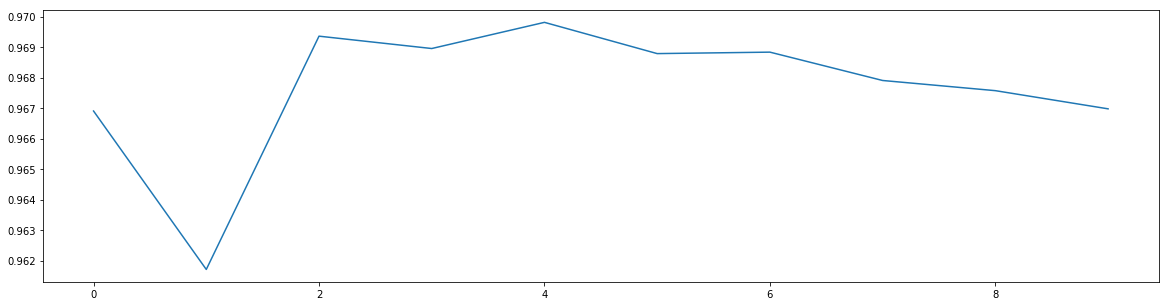

In [71]:
#KNN的k值学习曲线
#======【TIME WARNING:6mins 30s 】======#

score = []
for i in range(10):
    X_dr = PCA(23).fit_transform(X)
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

In [72]:
cross_val_score(KNN(4),X_dr,y,cv=5).mean()

0.9686185521328179